<h1>Titanic Revisited</h1>

Since I have started to develop some models, I would like to go back to the Titanic dataset and try new things.
The goal is still the same, to identify the survivor rate

In any analysis we are going to do we have to keep two things in mind, first our target variable, which in this case is the Survived column, all other columns are predictive

<h2> 1 - Starting </h2>
<ul>
    <li>It is a best practice perform the correlation earlier in the project</li>
    <li>Let's use multiple plots for better undertanding of the data</li>
</ul>

In [1427]:
#importing libraries

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns

# for data algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

<h2>Acquiring the data</h2>

In [1428]:
train_df = pd.read_csv(r'C:\Users\rafae\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\rafae\Downloads\train.csv')

In [1429]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1430]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<p>
    Let's underdand some os the columnas and identify insights earlier
</p>
<p>Categorical: Survived, Pclass, Sex, Embarked</p>
<p>Target: Survived</p>
<p>Numerical: PassengerId, Age, SibSp, Parch, Fare</p>
<p>Predictic: Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked </p>

In [1431]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [1432]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1433]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Abbott, Mrs. Stanton (Rosa Hunt)",male,347082,G6,S
freq,1,577,7,4,644


<p>This sample has 891 unique values</p>
<p>The average Survival rate is 38%.</p>
<p>75% of passengers are 3rd Class</p>
<p>The average age of the passengers was 30 years old</p>
<p>38% of passengers were traveling as a family</p>

History tells us that the highest rate of survivors were women and children, but to come to a consensus with this observation from history, we can make groups and identify if we are correct

In [1434]:
train_df[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Sex', ascending=True)

,Sex,Survived
0,female,0.742038
1,male,0.188908


74% of survivors were women

In [1435]:
train_df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass', ascending=True)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The highest survival rate was for people in the first class

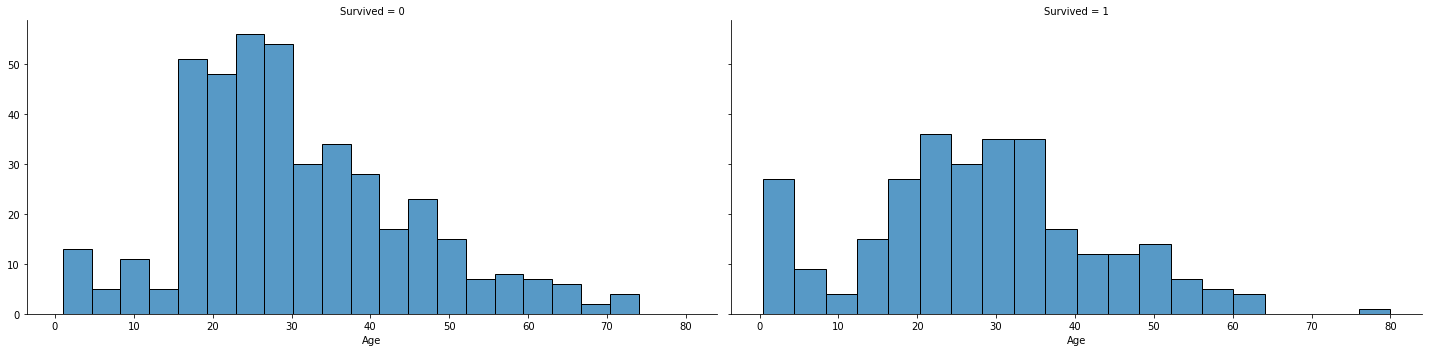

In [1436]:
g = sns.FacetGrid(train_df, col = 'Survived', height = 5.0, palette='flare', aspect=2)
g.map(sns.histplot, 'Age', bins = 20)
g.add_legend()

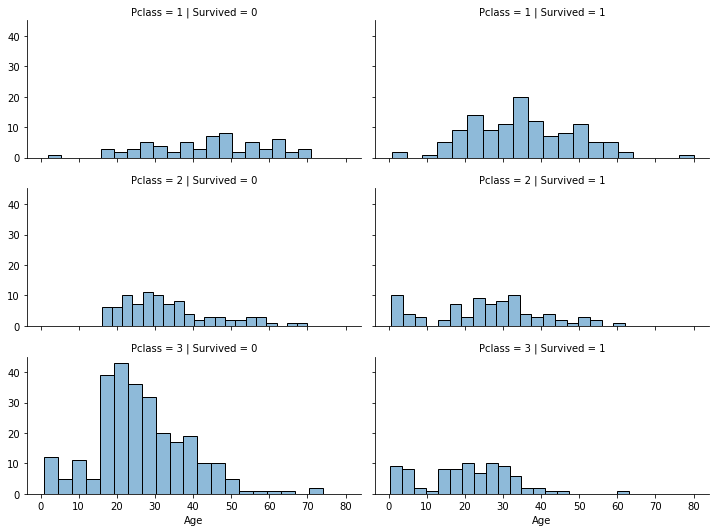

In [1437]:
g = sns.FacetGrid(data=train_df, col='Survived', row='Pclass', height=2.5, palette='flare', aspect=2, )
g.map(sns.histplot, 'Age', alpha=.5, bins=20)
g.add_legend()

<p>Most of the people were third class, but they did not survive.</p>

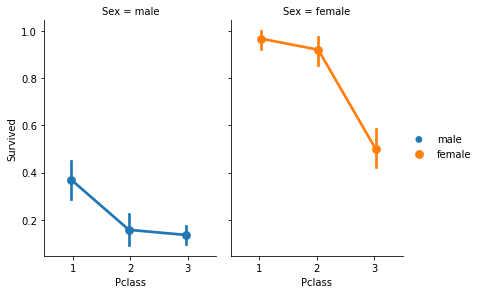

In [1438]:
g = sns.catplot(x="Pclass", y="Survived",
                hue="Sex", col="Sex",
                data=train_df, kind="point",
                dodge=True,
                height=4, aspect=.7);
g.add_legend()

Even though women survived the most, women in the third class did not have as much opportunity as those in the first class

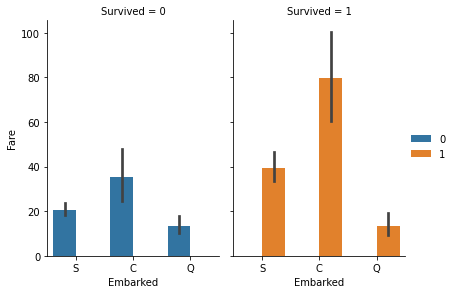

In [1439]:
g = sns.catplot(x="Embarked", y="Fare",
                hue="Survived", col="Survived",
                data=train_df, kind="bar",
                dodge=True,
                height=4, aspect=.7);
g.add_legend()

Let's remove the columns that are not part of our analysis and had no correlation with our target variable

In [1440]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Now let's create the dummies

In [1441]:
train_df['Sex'] = pd.get_dummies(train_df['Sex'], drop_first=True)
test_df ['Sex'] = pd.get_dummies(train_df['Sex'], drop_first=True)

In [1442]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [1443]:
#checking empty values
train_df.isna().sum().sort_values(ascending=True)

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Age         177
dtype: int64

In [1444]:
test_df.isna().sum().sort_values(ascending=True)

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Age         177
dtype: int64

Let's use a graph to understand age by passenger class and gender

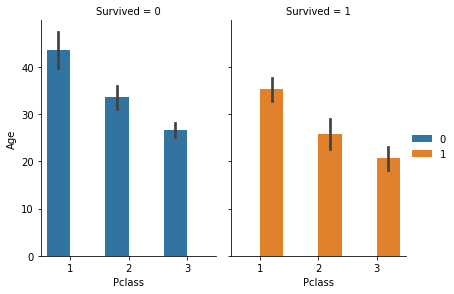

In [1445]:
g = sns.catplot(x="Pclass", y="Age",
                hue="Survived", col="Survived",
                data=train_df, kind="bar",
                dodge=True,
                height=4, aspect=.7);
g.add_legend()

In [1446]:
train_df[['Pclass','Age']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass', ascending=True)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [1447]:
train_df.loc[(train_df['Pclass'] == 1) & (train_df['Age'].isnull()), 'Age'] = 38
train_df.loc[(train_df['Pclass'] == 2) & (train_df['Age'].isnull()), 'Age'] = 30
train_df.loc[(train_df['Pclass'] == 3) & (train_df['Age'].isnull()), 'Age'] = 25

test_df.loc[(test_df['Pclass'] == 1) & (test_df['Age'].isnull()), 'Age'] = 38
test_df.loc[(test_df['Pclass'] == 2) & (test_df['Age'].isnull()), 'Age'] = 30
test_df.loc[(test_df['Pclass'] == 3) & (test_df['Age'].isnull()), 'Age'] = 25

In [1448]:
train_df['Embarked'].describe(include="O")

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [1449]:
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

In [1450]:
test_df.isna().sum().sort_values(ascending=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1451]:
train_df['Age']  = train_df['Age'].astype(int)
test_df['Age']  = test_df['Age'].astype(int)

In [1452]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [1453]:
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)
test_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [1454]:
train_df.loc[(train_df['Age'] <= 16), 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[(train_df['Age'] > 64), 'Age'] = 4

test_df.loc[(test_df['Age'] <= 16), 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[(test_df['Age'] > 64), 'Age'] = 4

In [1455]:
train_df = train_df.drop(columns=['AgeBand'], axis=1)
test_df = test_df.drop(columns=['AgeBand'], axis=1)

In [1456]:
#cuidando do embarked
train_df.loc[(train_df['Embarked'] == 'C'), 'Embarked']  = 0
train_df.loc[(train_df['Embarked'] == 'Q'), 'Embarked']  = 1
train_df.loc[(train_df['Embarked'] == 'S'), 'Embarked']  = 2

test_df.loc[(test_df['Embarked'] == 'C'), 'Embarked']  = 0
test_df.loc[(test_df['Embarked'] == 'Q'), 'Embarked']  = 1
test_df.loc[(test_df['Embarked'] == 'S'), 'Embarked']  = 2

In [1457]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,2
1,1,1,0,2,1,0,71.2833,0
2,1,3,0,1,0,0,7.9250,2
3,1,1,0,2,1,0,53.1000,2
4,0,3,1,2,0,0,8.0500,2


In [1458]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,2
1,1,1,0,2,1,0,71.2833,0
2,1,3,0,1,0,0,7.9250,2
3,1,1,0,2,1,0,53.1000,2
4,0,3,1,2,0,0,8.0500,2


In [1459]:
train_df.loc[(train_df['Parch'] == 0) & (train_df['SibSp'] == 0), 'TravelAlone'] = 1
train_df.loc[(train_df['Parch'] > 0) | (train_df['SibSp'] > 0), 'TravelAlone'] = 0

test_df.loc[(test_df['Parch'] == 0) & (test_df['SibSp'] == 0), 'TravelAlone'] = 1
test_df.loc[(test_df['Parch'] > 0) | (test_df['SibSp'] > 0), 'TravelAlone'] = 0

train_df[['TravelAlone','Survived']].groupby('TravelAlone', as_index=False).mean().sort_values(by='TravelAlone', ascending=True)

,TravelAlone,Survived
0,0.0,0.505650
1,1.0,0.303538


In [1460]:
train_df = train_df.drop(columns=['Parch','SibSp'], axis=1)
test_df = test_df.drop(columns=['Parch','SibSp'], axis=1)

In [1461]:
train_df['Fare'] = train_df['Fare'].round(2)
test_df['Fare'] = test_df['Fare'].round(2)
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,1,7.25,2,0.0
1,1,1,0,2,71.28,0,0.0
2,1,3,0,1,7.92,2,1.0
3,1,1,0,2,53.10,2,0.0
4,0,3,1,2,8.05,2,1.0


In [1462]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)
test_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.45]",0.303571
2,"(14.45, 31.0]",0.454955
3,"(31.0, 512.33]",0.581081


In [1463]:
train_df.loc[(train_df['Fare'] <= 7.91), 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.45), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.45) & (train_df['Fare'] <= 31.0), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 31.0), 'Fare'] = 3

test_df.loc[(test_df['Fare'] <= 7.91), 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.45), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.45) & (test_df['Fare'] <= 31.0), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 31.0), 'Fare'] = 3

In [1464]:
train_df = train_df.drop(columns=['FareBand'], axis=1)
test_df = test_df.drop(columns=['FareBand'], axis=1)

In [1465]:
test_df['TravelAlone'] = test_df['TravelAlone'].astype(np.int64)
test_df['Fare'] = test_df['Fare'].astype(np.int64)

train_df['TravelAlone'] = train_df['TravelAlone'].astype(np.int64)
train_df['Fare'] = train_df['Fare'].astype(np.int64)


<AxesSubplot:>

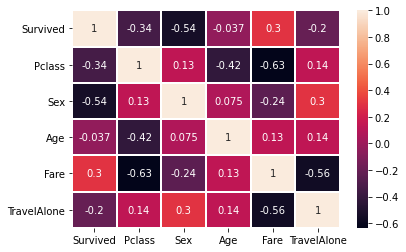

In [1466]:
sns.heatmap(train_df.corr(), robust=True, annot=True, linewidths=True)

<h2>Creating the model</h2>

In [1467]:
Xtrain = train_df.iloc[:, [1,2,3,4,5,6]].values
Ytrain = train_df.iloc[:, 0].values

In [1468]:
x_train, x_test, y_train, y_test = train_test_split(Xtrain,Ytrain, test_size= 0.2, random_state=42)

<h2>Generating Models</h2>

In [1469]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train,y_train) * 100, 2)
acc_log

79.21

In [1471]:
# support Vector Machines

svc = SVC()
svc.fit(x_train,y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train)* 100, 20)
acc_svc

82.16292134831461

In [1472]:
#KNN

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
Y_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train,y_train) * 100 , 2)
acc_knn

84.97

In [1473]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
Y_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(x_train,y_train) * 100, 2)
acc_gaussian

76.26

In [1474]:
#perceptron

perceptron = Perceptron()
perceptron.fit(x_train,y_train)
Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100 , 2)
acc_perceptron

76.12

In [1475]:
#Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100 , 2)
acc_linear_svc

78.51

In [1476]:
#Stochastic

sgd = SGDClassifier()
sgd.fit(x_train,y_train)
Y_pred = sgd.predict(x_test)

acc_sgd = round(sgd.score(x_train, y_train) * 100 , 2)
acc_sgd

78.09

In [1480]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100 , 2)
acc_decision_tree

86.38

In [1478]:
#Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
Y_pred = random_forest.predict(x_test)

acc_random_forest = round(random_forest.score(x_train, y_train) * 100 , 2)
acc_random_forest

86.38

In [1483]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [1482]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest'],
    'Score':[acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
})
models.sort_values(by='Score', ascending=True)

,Model,Score
4,Perceptron,76.120000
3,Gaussian Naive Bayes,76.260000
5,Linear SVC,78.510000
0,Logistic Regression,79.210000
1,Support Vector Machines,82.162921
2,KNN,84.970000
6,Stochastic Gradient Descent,86.380000
7,Decision Tree,86.380000
8,Random Forest,86.380000
